- Proyecto #2:

2. Comprensión inicial del dataset

In [6]:
# Importar librerías
import pandas as pd
import os

# Ruta del dataset
ruta = os.path.join("..", "data", "raw", "Base.xlsx")

# a. Cargar el dataset y visualizar primeras filas
df = pd.read_excel(ruta)
df.head()

,Año,Sucursal,Mes,Semana,Producto,Valores,Unidades
0,2024,Sucursal 001,1,1,PRODUCTO 1,249,1
1,2024,Sucursal 001,1,1,PRODUCTO 2,378,1
2,2024,Sucursal 001,1,1,PRODUCTO 6,803,2
3,2024,Sucursal 001,1,1,PRODUCTO 7,2857,5
4,2024,Sucursal 001,1,1,PRODUCTO 8,1715,3


b. Mostrar el tamaño del dataset (número de filas y columnas).

In [3]:
print("Número de filas y columnas:")
df.shape

Número de filas y columnas:


(24518, 7)

c. Describir brevemente qué representa cada columna (sucursal, producto, fecha, ventas u otras variables relevantes).

- Año: Año en el que se registró la venta.
- Sucursal: Identificador o nombre de la sucursal donde se realizó la venta.
- Mes: Mes del año correspondiente a cada registro.
- Semana: Número de semana del año en que se efectuó la venta.
- Producto: Nombre o código del producto vendido.
- Valores: Monto total de ventas (en unidades monetarias) generado por cada producto, sucursal y periodo.
- Unidades: Cantidad de unidades vendidas por producto, sucursal y periodo. Es una medida directa del volumen de ventas.


In [4]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24518 entries, 0 to 24517
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       24518 non-null  int64 
 1   Sucursal  24518 non-null  object
 2   Mes       24518 non-null  int64 
 3   Semana    24518 non-null  int64 
 4   Producto  24518 non-null  object
 5   Valores   24518 non-null  int64 
 6   Unidades  24518 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


d. Identificar el rango temporal de los datos (fecha mínima y máxima).

In [5]:
print("Año mínimo:", df["Año"].min())
print("Año máximo:", df["Año"].max())
print("Mes mínimo:", df["Mes"].min())
print("Mes máximo:", df["Mes"].max())
print("Semana mínima:", df["Semana"].min())
print("Semana máxima:", df["Semana"].max())

Año mínimo: 2024
Año máximo: 2025
Mes mínimo: 1
Mes máximo: 12
Semana mínima: 1
Semana máxima: 49


Contar valores nulos

In [6]:
print("\nValores nulos por columna:")
df.isnull().sum()


Valores nulos por columna:


Año         0
Sucursal    0
Mes         0
Semana      0
Producto    0
Valores     0
Unidades    0
dtype: int64

In [8]:
for col in ['Sucursal', 'Producto']:
    if col in df.columns:
        print(f"\nValores únicos en {col}:")
        print(df[col].unique())


Valores únicos en Sucursal:
['Sucursal 001' 'Sucursal 002' 'Sucursal 003' 'Sucursal 004'
 'Sucursal 005' 'Sucursal 006' 'Sucursal 007' 'Sucursal 008'
 'Sucursal 009' 'Sucursal 010' 'Sucursal 011' 'Sucursal 012'
 'Sucursal 013' 'Sucursal 014' 'Sucursal 015' 'Sucursal 016'
 'Sucursal 017' 'Sucursal 018' 'Sucursal 019' 'Sucursal 020'
 'Sucursal 021' 'Sucursal 022' 'Sucursal 023' 'Sucursal 024'
 'Sucursal 025' 'Sucursal 026' 'Sucursal 027' 'Sucursal 028'
 'Sucursal 029' 'Sucursal 030' 'Sucursal 031' 'Sucursal 032'
 'Sucursal 033' 'Sucursal 034' 'Sucursal 035' 'Sucursal 036'
 'Sucursal 037' 'Sucursal 038' 'Sucursal 039' 'Sucursal 040'
 'Sucursal 041' 'Sucursal 042' 'Sucursal 043' 'Sucursal 044'
 'Sucursal 045' 'Sucursal 046' 'Sucursal 047' 'Sucursal 048'
 'Sucursal 049' 'Sucursal 050' 'Sucursal 051' 'Sucursal 052'
 'Sucursal 053' 'Sucursal 054' 'Sucursal 055' 'Sucursal 056'
 'Sucursal 057' 'Sucursal 058' 'Sucursal 059' 'Sucursal 060'
 'Sucursal 061' 'Sucursal 062' 'Sucursal 063' 'Sucursal 

3. Validación de la estructura de los datos

a. Verificar los tipos de datos de cada variable (fecha, numérica, categórica).

In [9]:
print("\n=== 3.a) Tipos de datos de cada variable ===")
print(df.dtypes)


=== 3.a) Tipos de datos de cada variable ===
Año          int64
Sucursal    object
Mes          int64
Semana       int64
Producto    object
Valores      int64
Unidades     int64
dtype: object


b. Confirmar que la columna de fecha esté correctamente formateada como tipo datetime.

In [10]:
# Crear columna de fecha basada en Año + Semana (lunes de cada semana)
df["Fecha"] = pd.to_datetime(df["Año"].astype(str) + "-W" + df["Semana"].astype(str) + "-1", format="%G-W%V-%u")

print("\nColumna 'Fecha' creada correctamente:")
print(df[["Año", "Semana", "Fecha"]].head())

print("\nTipos después de agregar 'Fecha':")
print(df.dtypes)


Columna 'Fecha' creada correctamente:
    Año  Semana      Fecha
0  2024       1 2024-01-01
1  2024       1 2024-01-01
2  2024       1 2024-01-01
3  2024       1 2024-01-01
4  2024       1 2024-01-01

Tipos después de agregar 'Fecha':
Año                  int64
Sucursal            object
Mes                  int64
Semana               int64
Producto            object
Valores              int64
Unidades             int64
Fecha       datetime64[ns]
dtype: object


c. Validar que la frecuencia temporal sea consistente (diaria, semanal, mensual).

In [11]:
# Ordenamos el dataframe por fecha
df = df.sort_values("Fecha")

# Calculamos diferencias entre fechas consecutivas
df["Dif_Dias"] = df["Fecha"].diff().dt.days

print("\nEjemplo de diferencias entre fechas consecutivas:")
print(df["Dif_Dias"].value_counts().head(10))

print("\nFrecuencias encontradas (días entre registros):")
print(df["Dif_Dias"].describe())


Ejemplo de diferencias entre fechas consecutivas:
Dif_Dias
0.0     24497
28.0       13
35.0        7
Name: count, dtype: int64

Frecuencias encontradas (días entre registros):
count    24517.000000
mean         0.024840
std          0.874576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: Dif_Dias, dtype: float64


4. Análisis de valores faltantes y duplicados

a. Identificar columnas con valores nulos y el porcentaje de datos faltantes.

In [15]:
print("\nValores nulos por columna:")
nulidad = df.isnull().sum()
porcentaje = (df.isnull().sum() / len(df)) * 100

df_nulos = pd.DataFrame({
    "Valores Nulos": nulidad,
    "Porcentaje %": porcentaje.round(2)
})

df_nulos


Valores nulos por columna:


,Valores Nulos,Porcentaje %
Año,0,0.0
Sucursal,0,0.0
Mes,0,0.0
Semana,0,0.0
Producto,0,0.0
Valores,0,0.0
Unidades,0,0.0
Fecha,0,0.0
Dif_Dias,0,0.0


b. Definir estrategia para tratar valores faltantes

In [14]:
df = df.dropna(subset=["Dif_Dias"])

Se eliminó una única fila (0.004% del total) debido a que Dif_Dias no puede calcularse en el primer registro temporal. La imputación con 0 generaría una interpretación incorrecta.

c. Verificar y justificar cómo se manejarán registros duplicados.

In [16]:
# Contar duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

# Mostrar algunos duplicados (si existen)
if duplicados > 0:
    display(df[df.duplicated()].head())

Registros duplicados encontrados: 0


Durante el análisis de registros duplicados se verificó si existían filas repetidas completamente en el dataset.
El resultado fue de 0 duplicados, lo cual indica que la fuente de datos no presenta redundancia que pueda afectar cálculos de ventas, promedios o agregados.
Debido a esto, no fue necesario aplicar corrección adicional mediante eliminación (drop_duplicates()).

5. Análisis descriptivo general

a. Calcular métricas estadísticas básicas: media, mediana, mínimo, máximo, desviación estándar.

In [7]:
print("Métricas estadísticas básicas de ventas (Valores):")
print(df["Valores"].describe())  # media, mediana, min, max, std y más

print("\nMedia:", df["Valores"].mean())
print("Mediana:", df["Valores"].median())
print("Mínimo:", df["Valores"].min())
print("Máximo:", df["Valores"].max())
print("Desviación estándar:", df["Valores"].std())

Métricas estadísticas básicas de ventas (Valores):
count    24518.000000
mean       872.911453
std        899.087780
min         58.000000
25%        400.000000
50%        572.000000
75%       1143.000000
max      27141.000000
Name: Valores, dtype: float64

Media: 872.9114528101803
Mediana: 572.0
Mínimo: 58
Máximo: 27141
Desviación estándar: 899.0877795233855


b. Analizar distribución de ventas por:

In [8]:
# Distribución por producto
ventas_por_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)
print("\nVentas por Producto:")
print(ventas_por_producto)


Ventas por Producto:
Producto
PRODUCTO 10    8555782
PRODUCTO 8     3620136
PRODUCTO 7     2445575
PRODUCTO 6     2413802
PRODUCTO 9     1857792
PRODUCTO 2     1106682
PRODUCTO 4      848875
PRODUCTO 5      305606
PRODUCTO 3      140543
PRODUCTO 1      107250
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Producto'}, xlabel='Producto'>

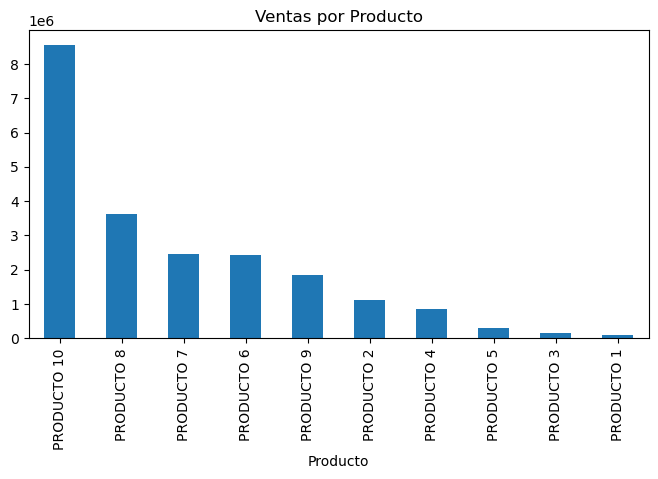

In [19]:
ventas_por_producto.plot(kind="bar", figsize=(8,4), title="Ventas por Producto")

Se observa que el Producto 10 concentra la mayor parte de las ventas superando ampliamente al resto, con un valor cercano a 8 millones. Le siguen los productos 8, 7 y 6, que presentan volúmenes de venta intermedios. En contraste, los productos 1, 3 y 5 registran los valores más bajos, evidenciando una menor participación en las ventas totales.


Top 10 Sucursales con mayor venta:
Sucursal
Sucursal 263    362191
Sucursal 182    266653
Sucursal 219    264701
Sucursal 274    237783
Sucursal 149    230485
Sucursal 016    213465
Sucursal 190    200808
Sucursal 001    179816
Sucursal 179    176505
Sucursal 080    171161
Name: Valores, dtype: int64


<Axes: title={'center': 'Top 10 Sucursales con mayor venta'}, xlabel='Sucursal'>

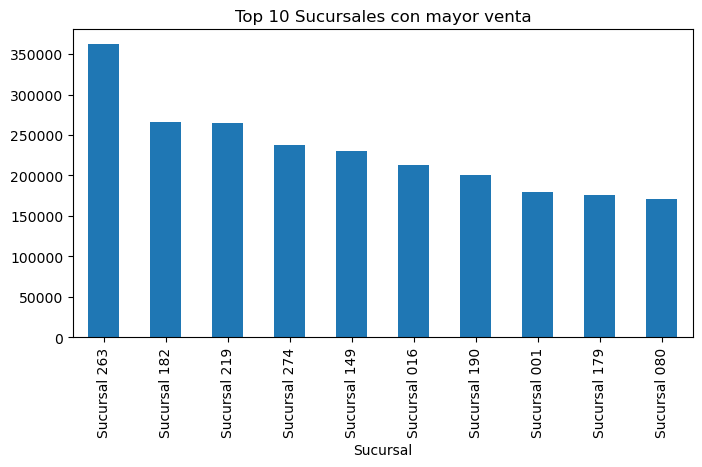

In [10]:
# Distribución por sucursal (top 10)
ventas_por_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Sucursales con mayor venta:")
print(ventas_por_sucursal)

ventas_por_sucursal.plot(kind="bar", figsize=(8,4), title="Top 10 Sucursales con mayor venta")

Se observa que la Sucursal 263 lidera claramente el ranking, superando las 350 000 unidades monetarias, mientras que las demás presentan montos entre 270 000 y 180 000. Las sucursales 182, 219 y 274 también mantienen un desempeño destacado, aunque con menor volumen que la líder. En general, los datos reflejan una distribución desigual de ventas entre sucursales, donde unas pocas concentran una proporción significativa del total, lo que puede deberse a factores como ubicación, tamaño o cartera de clientes.

Distribución por periodo de tiempo

In [24]:
# Ventas por día
ventas_por_dia = df.groupby("Fecha")["Valores"].sum()
print("\n Ventas por Día:")
print(ventas_por_dia.head())


 Ventas por Día:
Fecha
2024-01-01    1055859
2024-01-29    1064423
2024-02-26    1222046
2024-04-01    1193041
2024-04-29    1331557
Name: Valores, dtype: int64


In [25]:
# Ventas por semana
ventas_por_semana = df.groupby("Semana")["Valores"].sum()
print("\n Ventas por Semana:")
print(ventas_por_semana)


 Ventas por Semana:
Semana
1     2064538
5     1961145
9     2261196
14    2307504
18    2582984
22    1117591
23    1096546
27    2104202
31    1854440
36    1585653
40     831906
44     770618
49     863471
Name: Valores, dtype: int64



 Ventas por Mes:
Mes
1     2064538
2     1961145
3     2261196
4     2307504
5     2582984
6     2214137
7     2104202
8     1854440
9     1585653
10     831906
11     770618
12     863471
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Mes'}, xlabel='Mes'>

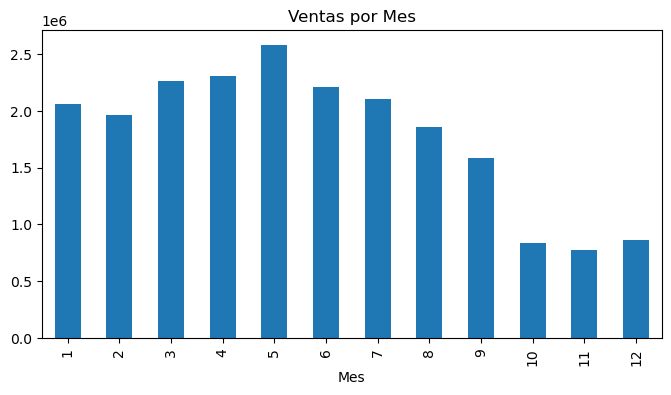

In [26]:
# Ventas por mes
ventas_por_mes = df.groupby("Mes")["Valores"].sum()
print("\n Ventas por Mes:")
print(ventas_por_mes)

ventas_por_mes.plot(kind="bar", figsize=(8,4), title="Ventas por Mes")

La gráfica muestra la evolución de las ventas a lo largo del año, agrupadas por mes. Se observa un crecimiento progresivo desde enero hasta mayo, alcanzando el pico máximo en el mes 5 con más de 2.5 millones en ventas.
A partir de junio, las ventas comienzan a disminuir gradualmente, con una caída más marcada entre septiembre y noviembre, meses en los que se registra la menor actividad comercial del año. En diciembre se aprecia una ligera recuperación, posiblemente asociada a incrementos estacionales de fin de año. En general, los datos indican una estacionalidad clara, con ventas altas en el primer semestre y una tendencia descendente hacia el cierre del año.


Ventas por Año:
Año
2024    12364509
2025     9037534
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Año'}, xlabel='Año'>

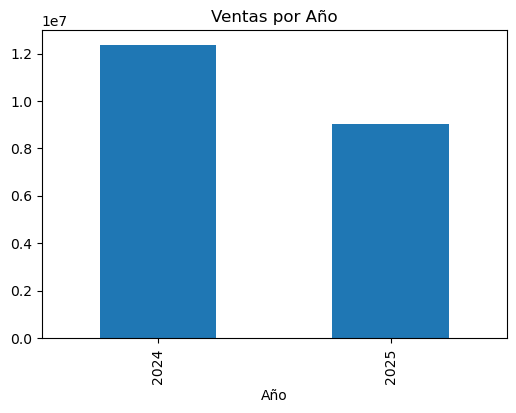

In [11]:
# Ventas por año
ventas_por_anio = df.groupby("Año")["Valores"].sum()
print("\nVentas por Año:")
print(ventas_por_anio)

ventas_por_anio.plot(kind="bar", figsize=(6,4), title="Ventas por Año")

Se observa que en 2024 las ventas alcanzaron aproximadamente 12.5 millones, mientras que en 2025 suman cerca de 9 millones. podría interpretarse como una caída en el desempeño comercial; sin embargo, es importante considerar que los datos de 2024 corresponden al año completo, mientras que los de 2025 abarcan únicamente el periodo de enero a septiembre.

6. Exploración temporal

In [29]:
df = df.sort_values("Fecha")

a. Graficar la evolución de ventas a lo largo del tiempo.

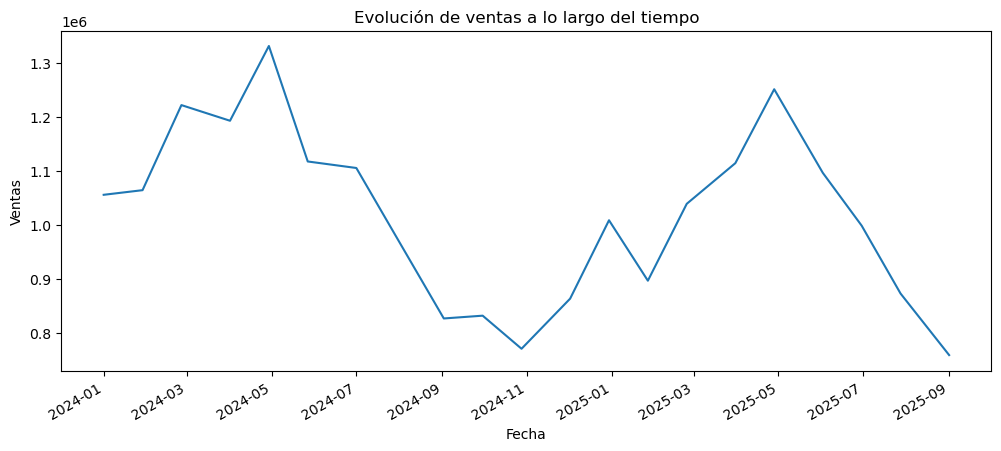

In [30]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_diarias = df.groupby("Fecha")["Valores"].sum()

plt.figure(figsize=(12,5))
ventas_diarias.plot()
plt.title("Evolución de ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

La gráfica muestra la evolución mensual de las ventas desde enero de 2024 hasta septiembre de 2025.
Durante el año 2024 se observa un aumento sostenido de ventas hasta mayo, mes en el que se alcanza el pico máximo del periodo analizado. Posteriormente, las ventas presentan una tendencia descendente entre julio y noviembre de 2024, reflejando una baja por el comportamiento de mercado. A inicios de 2025, las ventas muestran una recuperación gradual, alcanzando un nuevo punto alto en mayo de 2025, aunque sin superar los valores máximos del año anterior.
Después de ese mes, la tendencia vuelve a ser descendente hasta septiembre de 2025, último mes registrado en el dataset.

b. Identificar patrones de:

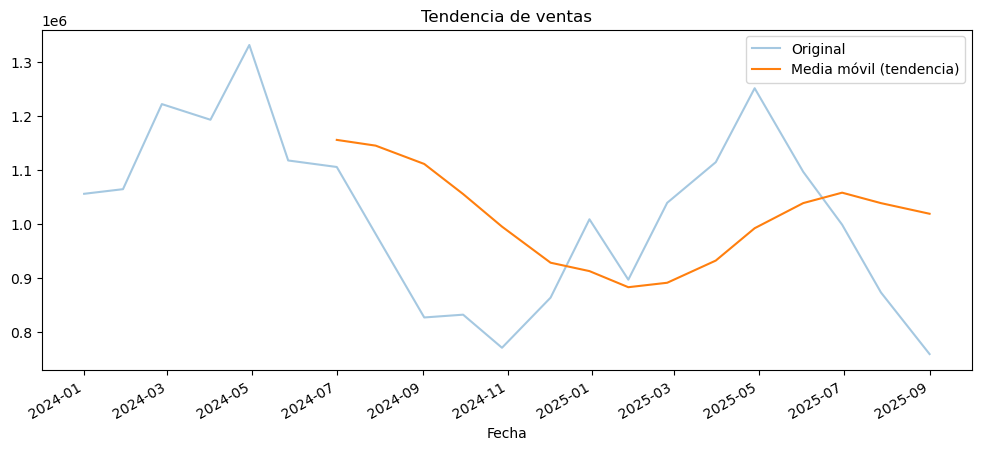

In [33]:
# i. Tendencia
# Media móvil de 7 días
rolling = ventas_diarias.rolling(window=7).mean()

plt.figure(figsize=(12,5))
ventas_diarias.plot(alpha=0.4, label="Original")
rolling.plot(label="Media móvil (tendencia)")
plt.title("Tendencia de ventas")
plt.legend()
plt.show()

Durante el primer semestre de 2024, la tendencia muestra un crecimiento sostenido que alcanza su punto máximo en mayo de 2024. A partir de ese mes, las ventas comienzan una fase descendente prolongada que se extiende hasta finales de 2024, marcando un periodo de menor actividad comercial. En 2025, la tendencia inicia con una recuperación moderada que alcanza su punto máximo hacia mediados de año (mayo-junio), seguida de una nueva disminución hasta septiembre.
En conjunto, la serie evidencia patrones cíclicos con picos de venta semestrales, lo que sugiere la presencia de estacionalidad en la demanda.

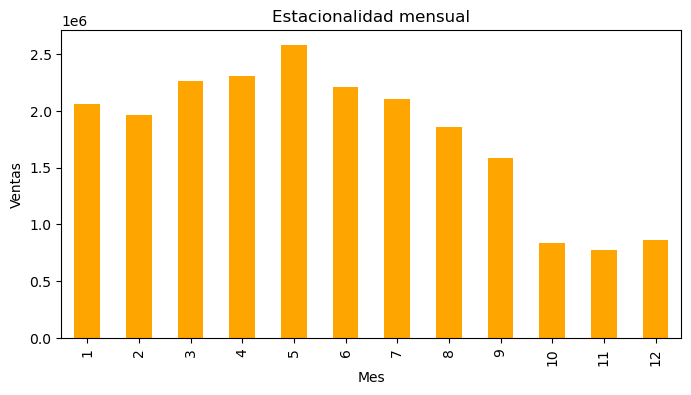

In [34]:
# ii. Estacionalidad
ventas_mes = df.groupby("Mes")["Valores"].sum()

plt.figure(figsize=(8,4))
ventas_mes.plot(kind="bar", color="orange")
plt.title("Estacionalidad mensual")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()

La gráfica muestra un comportamiento estacional de las ventas, con un aumento sostenido de enero a mayo, alcanzando el pico máximo en el mes 5, seguido de una disminución progresiva hasta noviembre. Esto evidencia que las ventas son más altas durante el primer semestre del año y tienden a bajar en la segunda mitad por el comportamiento de mercado

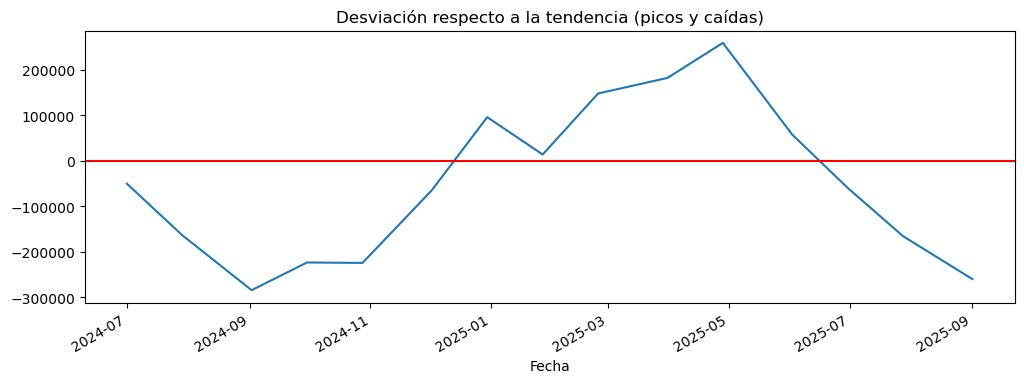

In [35]:
# iii. Picos y caídas abruptas
# Diferencia entre ventas y tendencia
desviacion = ventas_diarias - rolling

plt.figure(figsize=(12,4))
desviacion.plot()
plt.axhline(0, color='red')
plt.title("Desviación respecto a la tendencia (picos y caídas)")
plt.show()

La gráfica muestra las fluctuaciones de ventas respecto a la tendencia general. Se observan caída entre julio y noviembre de 2024, seguidas de una recuperación importante a inicios de 2025, alcanzando el pico máximo en mayo de 2025.

iv. Analizar ciclos por días de la semana o meses

In [36]:
df["Dia_Semana"] = df["Fecha"].dt.day_name()

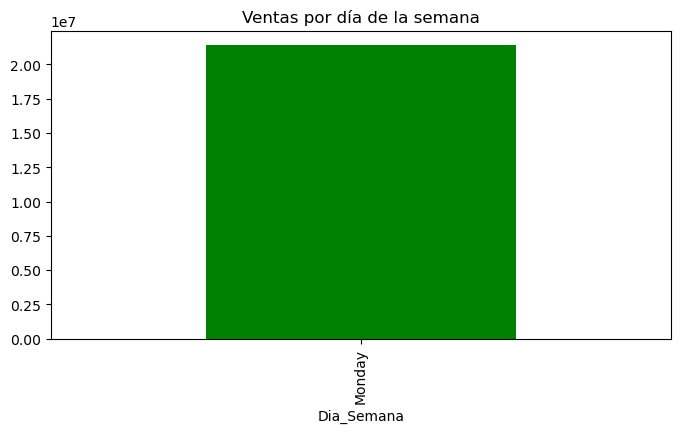

In [38]:
# Ventas por día de la semana:
ventas_diasemana = df.groupby("Dia_Semana")["Valores"].sum().sort_values()

plt.figure(figsize=(8,4))
ventas_diasemana.plot(kind="bar", color="green")
plt.title("Ventas por día de la semana")
plt.show()

En nuestro data set no contamos con información por dia de la semana por ende todo se refleja en el lunes.

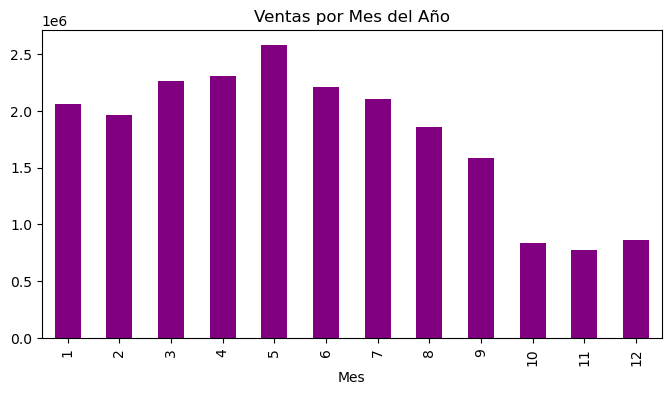

In [39]:
# Ventas por mes
ventas_mes = df.groupby("Mes")["Valores"].sum()

plt.figure(figsize=(8,4))
ventas_mes.plot(kind="bar", color="purple")
plt.title("Ventas por Mes del Año")
plt.show()

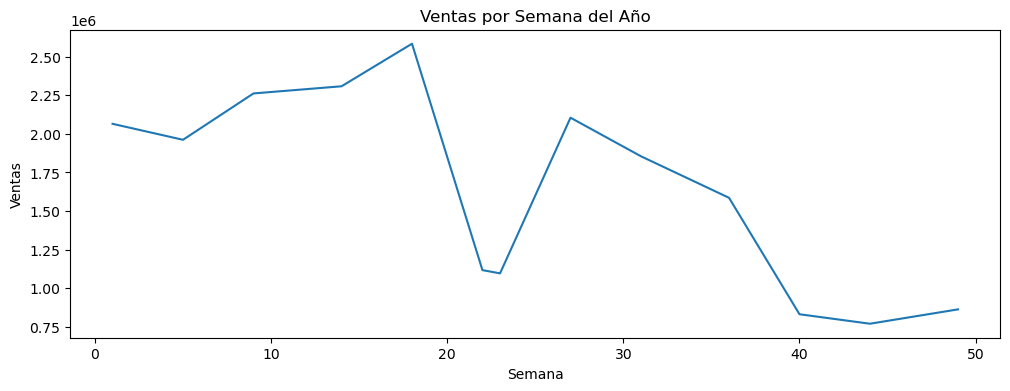

In [40]:
# estacionalidad semanal
ventas_semana = df.groupby("Semana")["Valores"].sum()

plt.figure(figsize=(12,4))
ventas_semana.plot()
plt.title("Ventas por Semana del Año")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.show()

El gráfico presenta la variación de las ventas semanales durante el año. Se observa que las ventas alcanzan sus valores más altos entre las semanas 15 y 20, mientras que disminuyen gradualmente hacia las semanas finales del año.

7. Análisis comparativo entre sucursales y productos

a. Identificar productos más vendidos y menos vendidos.

Top productos más vendidos:
Producto
PRODUCTO 10    8555782
PRODUCTO 8     3620136
PRODUCTO 7     2445575
PRODUCTO 6     2413802
PRODUCTO 9     1857792
Name: Valores, dtype: int64

Productos menos vendidos:
Producto
PRODUCTO 2    1106682
PRODUCTO 4     848875
PRODUCTO 5     305606
PRODUCTO 3     140543
PRODUCTO 1     107250
Name: Valores, dtype: int64


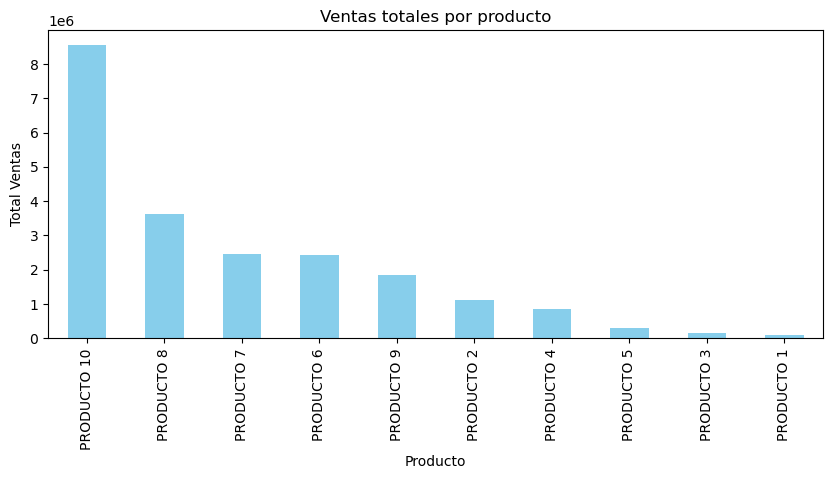

In [16]:
ventas_por_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)

print("Top productos más vendidos:")
print(ventas_por_producto.head(5))

print("\nProductos menos vendidos:")
print(ventas_por_producto.tail(5))

# Visualización
ventas_por_producto.plot(kind="bar", figsize=(10,4), color="skyblue", title="Ventas totales por producto")
plt.ylabel("Total Ventas")
plt.show()

b. Comparar desempeño entre sucursales.


 Top 10 sucursales con mayores ventas:
Sucursal
Sucursal 263    362191
Sucursal 182    266653
Sucursal 219    264701
Sucursal 274    237783
Sucursal 149    230485
Sucursal 016    213465
Sucursal 190    200808
Sucursal 001    179567
Sucursal 179    176505
Sucursal 080    171161
Name: Valores, dtype: int64


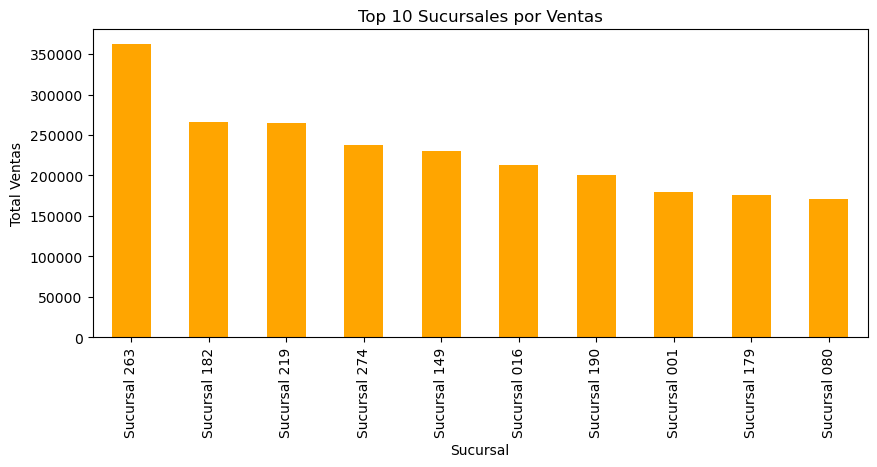

In [42]:
ventas_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False)

print("\n Top 10 sucursales con mayores ventas:")
print(ventas_sucursal.head(10))

ventas_sucursal.head(10).plot(kind="bar", figsize=(10,4), color="orange", title="Top 10 Sucursales por Ventas")
plt.ylabel("Total Ventas")
plt.show()

c. Detectar outliers o comportamientos anómalos por sucursal o producto.

In [43]:
# se detecta los outliers con método del rango intercuartílico (IQR)
Q1 = df["Valores"].quantile(0.25)
Q3 = df["Valores"].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["Valores"] < limite_inferior) | (df["Valores"] > limite_superior)]

print(f" Registros anómalos detectados: {len(outliers)}")
display(outliers.head())

 Registros anómalos detectados: 1770


,Año,Sucursal,Mes,Semana,Producto,Valores,Unidades,Fecha,Dif_Dias,Dia_Semana
5907,2024,Sucursal 145,1,1,PRODUCTO 10,3143,2,2024-01-01,0.0,Monday
6082,2024,Sucursal 149,1,1,PRODUCTO 6,2409,6,2024-01-01,0.0,Monday
5298,2024,Sucursal 128,1,1,PRODUCTO 10,2629,1,2024-01-01,0.0,Monday
4867,2024,Sucursal 117,1,1,PRODUCTO 10,2572,1,2024-01-01,0.0,Monday
4659,2024,Sucursal 113,1,1,PRODUCTO 10,2457,1,2024-01-01,0.0,Monday


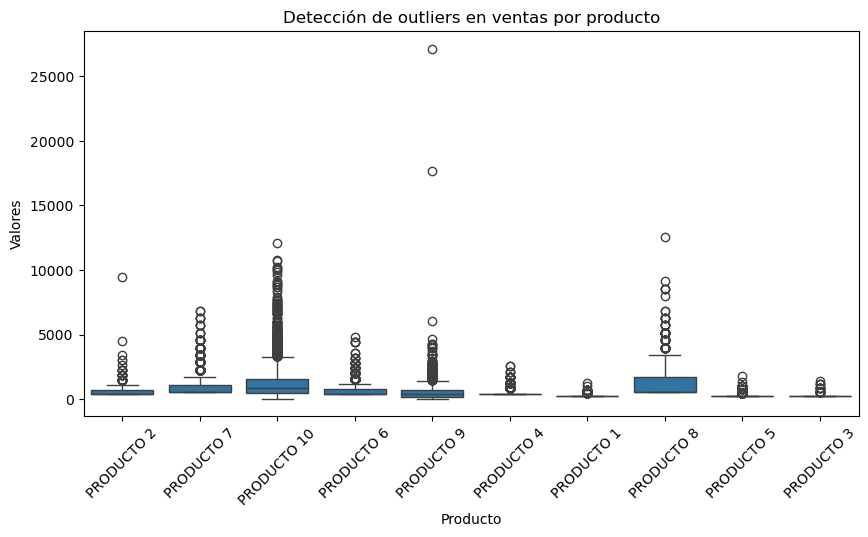

In [44]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="Producto", y="Valores", data=df)
plt.title("Detección de outliers en ventas por producto")
plt.xticks(rotation=45)
plt.show()

La mayoría de los outliers corresponden a productos con alta rotación, como el Producto 10, lo que sugiere posibles picos de demanda, errores de registro o ventas excepcionales en determinadas sucursales. Estos valores deben evaluarse antes del modelado, ya que podrían influir en las métricas de tendencia.

8. Visualizaciones clave (obligatorias)

In [45]:
# formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

a. Series de tiempo de ventas totales.

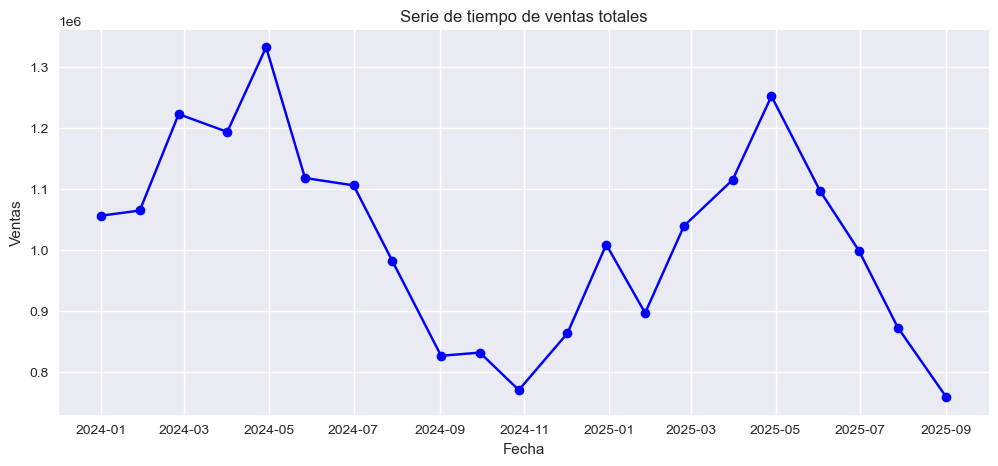

In [49]:
# Serie de tiempo de ventas totales
ventas_diarias = df.groupby("Fecha")["Valores"].sum()

plt.figure(figsize=(12,5))
plt.plot(ventas_diarias, marker="o", linestyle="-", color="blue")
plt.title("Serie de tiempo de ventas totales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

La gráfica muestra la serie de tiempo de las ventas totales entre enero de 2024 y septiembre de 2025. Se observan variaciones mensuales con picos de ventas notables en mayo de 2024 y mayo de 2025, seguidos por una tendencia descendente hacia los meses finales de cada año.

b. Gráfico de barras comparando ventas por sucursal.

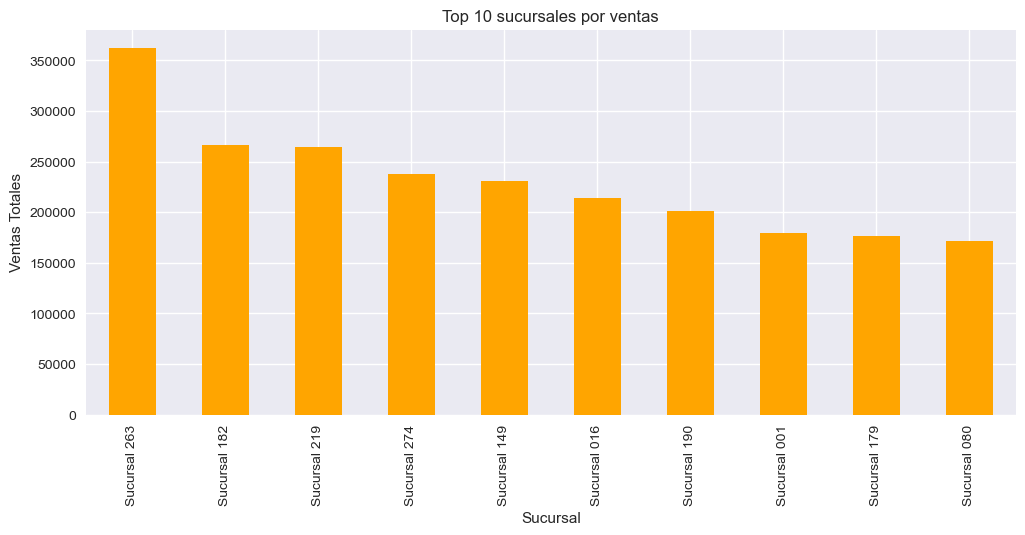

In [50]:
# Ventas por sucursal (Top 10)
ventas_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
ventas_sucursal.plot(kind="bar", color="orange")
plt.title("Top 10 sucursales por ventas")
plt.xlabel("Sucursal")
plt.ylabel("Ventas Totales")
plt.show()

El gráfico muestra el Top 10 de sucursales con mayores ventas totales. La Sucursal 263 lidera ampliamente con el volumen de ventas más alto, seguida por las sucursales 182 y 219, que mantienen un desempeño sólido. Las demás sucursales presentan cifras más equilibradas, pero con una brecha notable respecto a las primeras posiciones.

c. Gráfico de barras comparando ventas por producto.

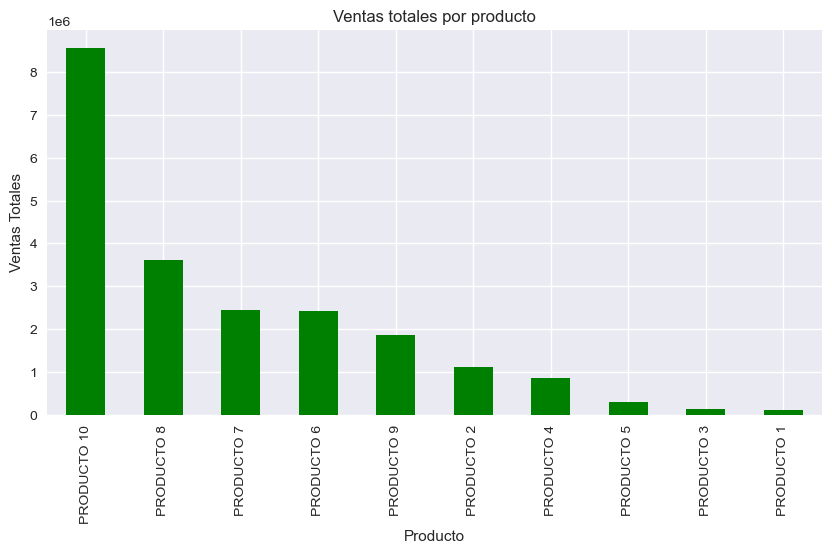

In [51]:
# Ventas por producto
ventas_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ventas_producto.plot(kind="bar", color="green")
plt.title("Ventas totales por producto")
plt.xlabel("Producto")
plt.ylabel("Ventas Totales")
plt.show()

La gráfica presenta las ventas totales por producto, evidenciando una fuerte concentración en el Producto 10, que lidera las ventas con una diferencia considerable frente al resto. Le siguen los productos 8, 7 y 6, que mantienen un desempeño intermedio, mientras que los productos 1, 3 y 5 registran los niveles de venta más bajos.

d. Heatmap o matriz para visualizar comportamiento de ventas en el tiempo y por sucursal/producto.

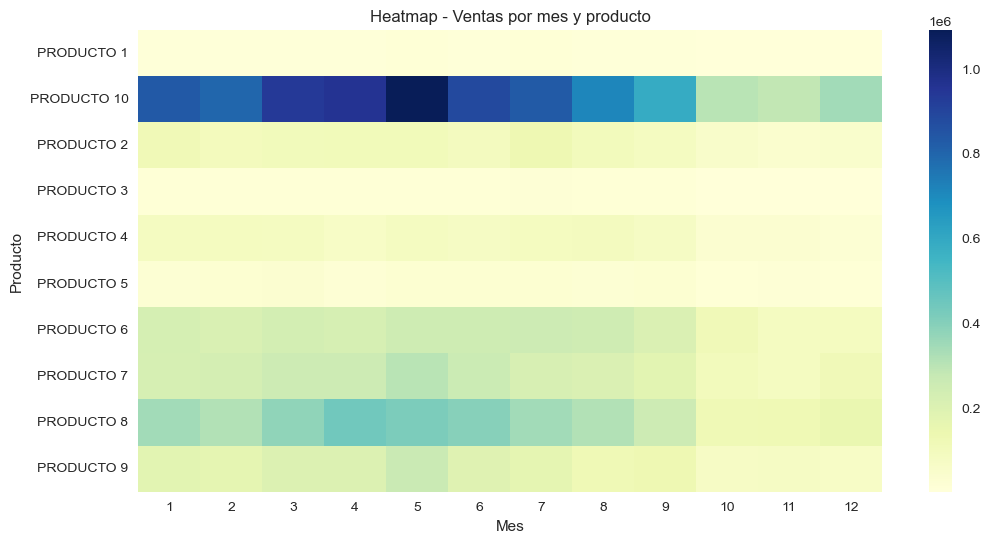

In [52]:
# Heatmap: ventas por mes y producto
pivot_prod_mes = df.pivot_table(values="Valores", index="Producto", columns="Mes", aggfunc="sum")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_prod_mes, cmap="YlGnBu", annot=False)
plt.title("Heatmap - Ventas por mes y producto")
plt.show()

Se observa que el Producto 10 mantiene consistentemente los niveles más altos de ventas a lo largo del año, con un pico máximo alrededor del mes 5 (mayo). Por otro lado, los productos 8, 7 y 6 presentan una actividad media, mientras que los productos 1, 3 y 5 mantienen ventas muy bajas durante todos los meses.

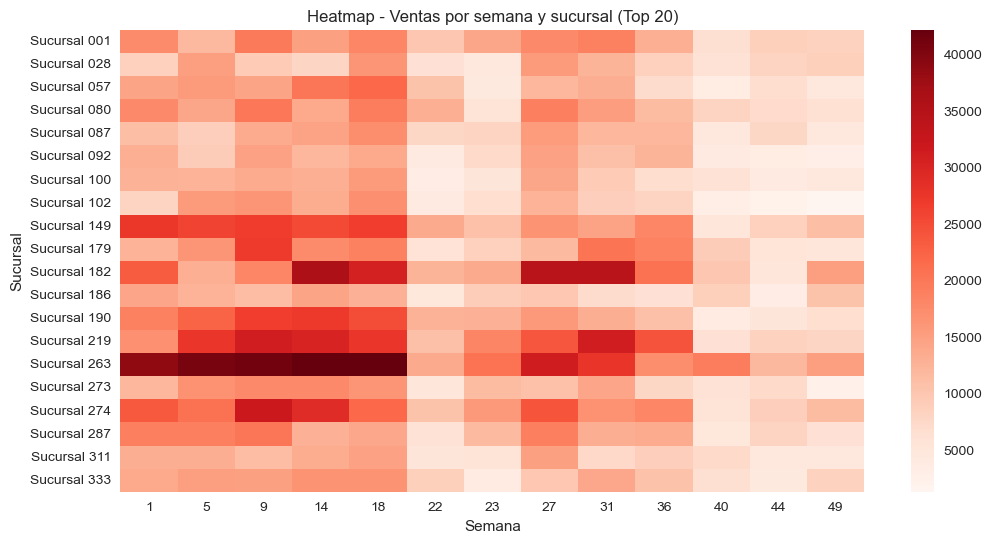

In [53]:
# Heatmap de ventas por semana y sucursal (Top 20 para claridad)
# Seleccionar top sucursales
top_suc = df["Sucursal"].value_counts().head(20).index
temp = df[df["Sucursal"].isin(top_suc)]

pivot_sem_suc = temp.pivot_table(values="Valores", index="Sucursal", columns="Semana", aggfunc="sum")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_sem_suc, cmap="Reds")
plt.title("Heatmap - Ventas por semana y sucursal (Top 20)")
plt.show()

Los tonos más oscuros indican semanas con mayores volúmenes de ventas, mientras que los más claros reflejan menor actividad. Se observa que la Sucursal 263 destaca de manera consistente con las ventas más altas, seguida por las sucursales 219, 182 y 274, que también mantienen un comportamiento sobresaliente en varios periodos del año.

9.  Para cada serie temporal específica (ventas totales, ventas por sucursal, Ventas por producto y ventas por sucursal-producto).

i. Gráfico de Autocorrelación (ACF): muestra la dependencia entre la serie y sus rezagos. 

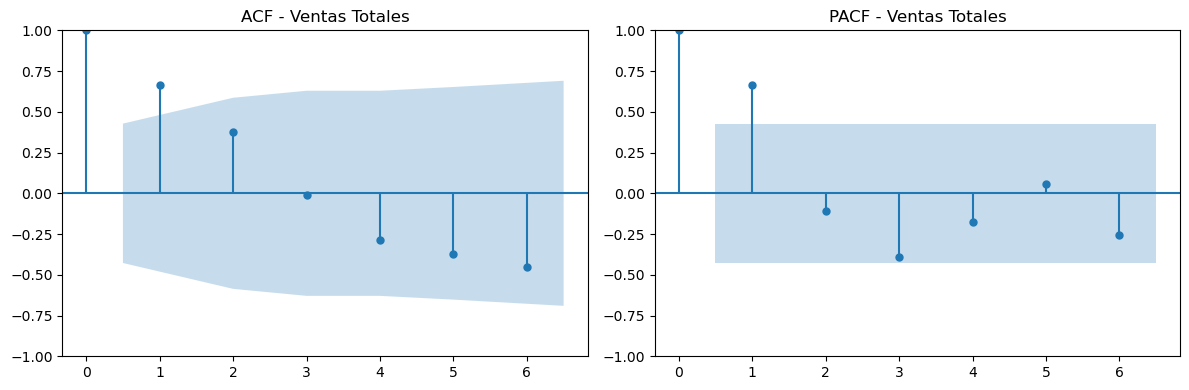

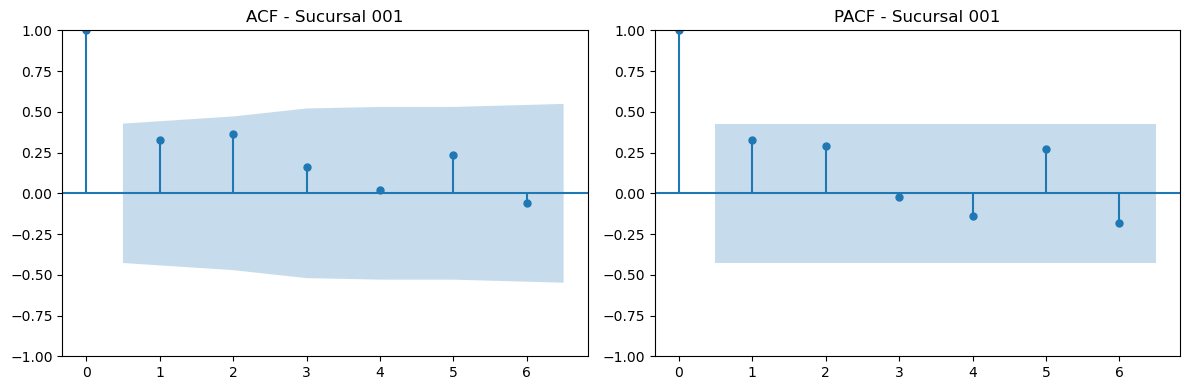

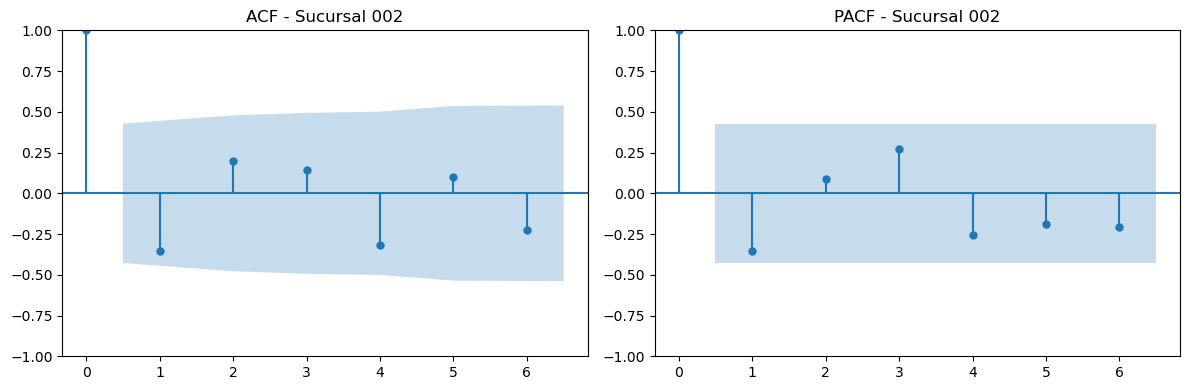

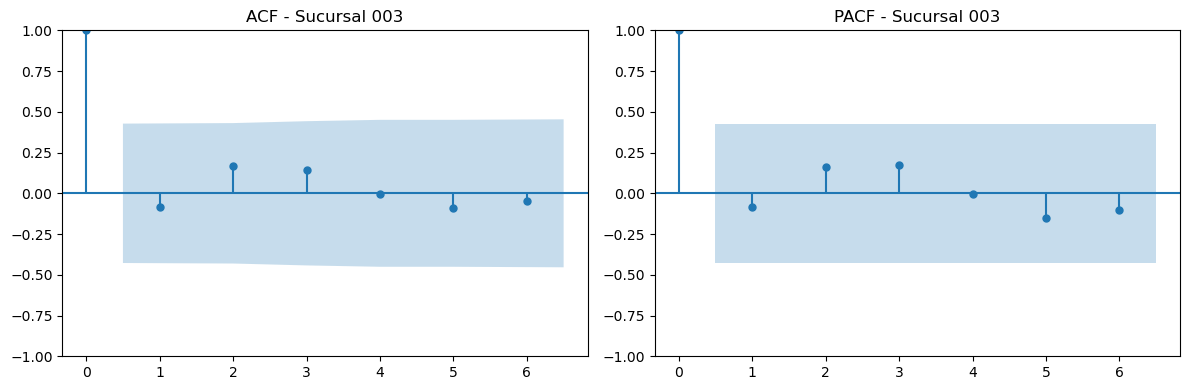

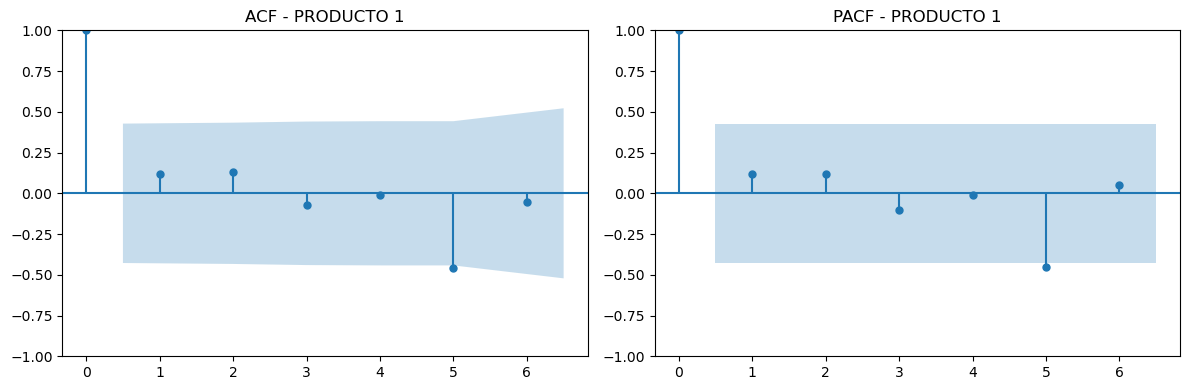

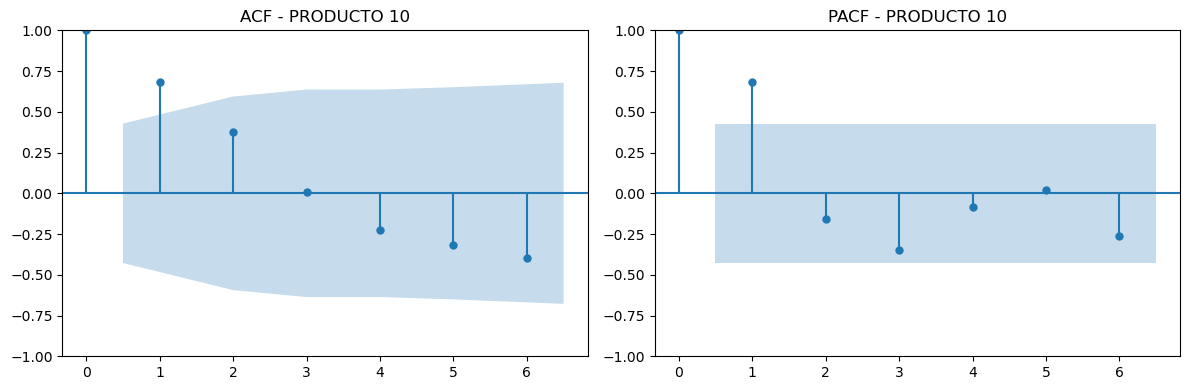

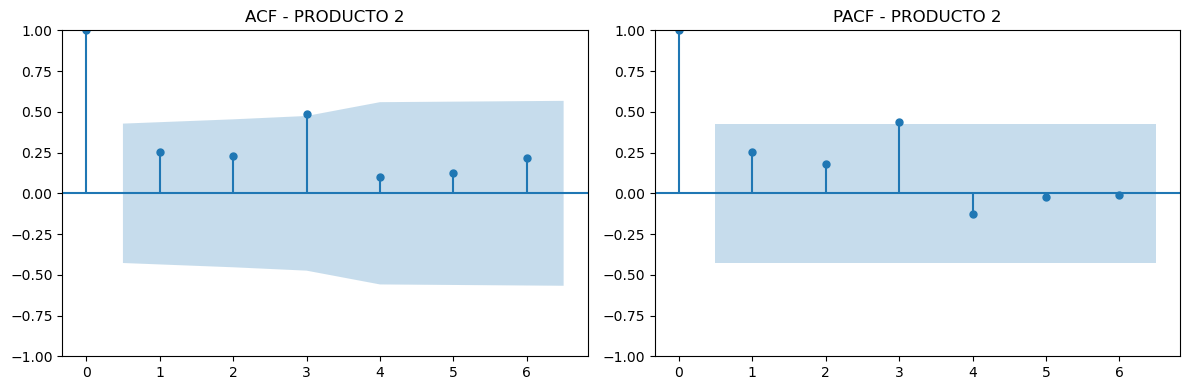

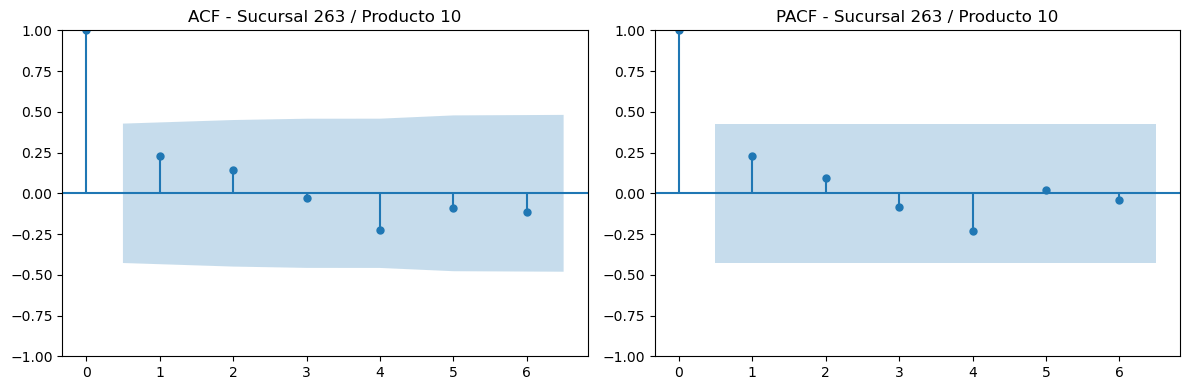

In [ ]:
# Librerías 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#  Columna Fecha
df['Fecha'] = pd.to_datetime(dict(year=df['Año'], month=df['Mes'], day=1))

ventas_totales = df.groupby('Fecha')['Valores'].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ventas_totales, ax=ax[0], lags=6)
ax[0].set_title("ACF - Ventas Totales")
plot_pacf(ventas_totales, ax=ax[1], lags=6, method='ywm')
ax[1].set_title("PACF - Ventas Totales")
plt.tight_layout()
plt.show()

# Ventas por Sucursal
ventas_sucursal = df.groupby(['Fecha', 'Sucursal'])['Valores'].sum().unstack().fillna(0)

for sucursal in ventas_sucursal.columns[:3]:  #Por la cantidad de sucursales solo se toman las primeras 3
    serie = ventas_sucursal[sucursal]
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(serie, ax=ax[0], lags=6)
    ax[0].set_title(f"ACF - {sucursal}")
    plot_pacf(serie, ax=ax[1], lags=6, method='ywm')
    ax[1].set_title(f"PACF - {sucursal}")
    plt.tight_layout()
    plt.show()

# Ventas por Producto
ventas_producto = df.groupby(['Fecha', 'Producto'])['Valores'].sum().unstack().fillna(0)

for producto in ventas_producto.columns[:3]: 
    serie = ventas_producto[producto]
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(serie, ax=ax[0], lags=6)
    ax[0].set_title(f"ACF - {producto}")
    plot_pacf(serie, ax=ax[1], lags=6, method='ywm')
    ax[1].set_title(f"PACF - {producto}")
    plt.tight_layout()
    plt.show()

# Ventas por Sucursal-Producto
ventas_sucprod = df.groupby(['Fecha', 'Sucursal', 'Producto'])['Valores'].sum().reset_index()

# Sucursal con producto representativo
ejemplo = ventas_sucprod[(ventas_sucprod['Sucursal'] == 'Sucursal 263') &
                         (ventas_sucprod['Producto'] == 'PRODUCTO 10')]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ejemplo['Valores'], ax=ax[0], lags=6)
ax[0].set_title("ACF - Sucursal 263 / Producto 10")
plot_pacf(ejemplo['Valores'], ax=ax[1], lags=6, method='ywm')
ax[1].set_title("PACF - Sucursal 263 / Producto 10")
plt.tight_layout()
plt.show()



En el análisis de autocorrelación (ACF) y autocorrelación parcial (PACF) para la Sucursal 263 y el Producto 10, se observa una correlación significativa únicamente en el primer rezago, lo que indica que las ventas de este producto tienden a depender principalmente del período inmediato anterior. A partir del segundo rezago, las correlaciones se estabilizan dentro del rango de confianza, lo que sugiere que no existe una dependencia prolongada ni un patrón estacional fuerte. En general, el comportamiento refleja una relación temporal corta y estable, en la que las variaciones recientes influyen levemente en las ventas del siguiente período.

10. Insights y conclusiones del EDA 

# a. Identificar variables que afectan directamente las ventas. 
se identificó que las variables que más influyen directamente en el comportamiento de las ventas son el producto, la sucursal y el mes. Los resultados muestran que ciertos productos particularmente los de mayor rotación como Producto 10 y Producto 8 concentran una proporción significativa del total vendido. algunas sucursales, como la Sucursal 263, presentan un desempeño superior de forma constante, lo cual indica diferencias en la demanda según ubicación o capacidad operativa. Demuestra que el mes influye de manera estacional en las ventas, reflejando periodos de mayor actividad comercial.
# b. Detectar patrones útiles para el modelo de forecasting. 
Se evidencia la presencia de dependencias temporales de corto plazo, donde las ventas de un período están influenciadas por las del mes anterior. También se identifican patrones cíclicos y variaciones estacionales, lo que sugiere que las ventas tienden a repetirse en ciertos meses o trimestres del año. Estos hallazgos son valiosos para el desarrollo de un modelo de forecasting, ya que permiten considerar componentes AR (autoregresivos) y S (estacionales) en un modelo tipo SARIMA o modelos híbridos de predicción. 
# c. Concluir sobre la calidad y preparación del dataset para las etapas siguientes del proyecto.
El dataset presenta una estructura limpia, organizada y con suficiente granularidad temporal (Año–Mes–Semana) para el desarrollo de modelos predictivos. Aunque se detectaron algunos outliers, estos se asocian principalmente con picos de demanda estacional y no con errores de registro, por lo que pueden conservarse para reflejar la variabilidad real del negocio. En términos generales, la base de datos se encuentra lista para la etapa de modelado, con información confiable, relaciones claras entre variables y evidencia de patrones que aportan valor al proceso de pronóstico.